In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ranksums
from tabulate import tabulate
import sys

In [2]:
with open('solutions/wheel200.txt', 'r') as file, open('solutions/tourn200.txt', 'r') as file2, open('solutions/gbest200.txt', 'r') as file3, open('solutions/lbest200.txt', 'r') as file4:
    # Διαβάστε τις γραμμές του αρχείου
    lines = file.readlines()
    lines2 = file2.readlines()
    lines3 = file3.readlines()
    lines4 = file4.readlines()

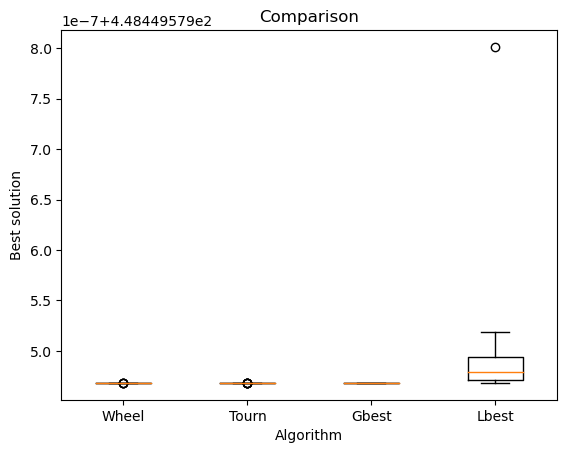

wheel and tourn 1: statistic=1.765659350264504, p-value=0.07745301640549514
wheel and gbest 1: statistic=-5.461902275818218, p-value=4.710593831823448e-08
wheel and lbest 1: statistic=-6.063390625908324, p-value=1.332814294054072e-09
tourn and gbest 1: statistic=-4.5305654756787, p-value=5.882601937754226e-06
tourn and lbest 1: statistic=-6.063390625908324, p-value=1.332814294054072e-09
gbest and lbest 1: statistic=6.063390625908324, p-value=1.332814294054072e-09

                     Mean              Median     Standard Deviation  \
                                                                       
wheel   448.4495794681987  448.44957946819875  5.684341886080802e-14   
tourn   448.4495794681987  448.44957946819875  7.454944493817948e-14   
gbest  448.44957946819886   448.4495794681988  5.569494857771083e-14   
lbest   448.4495794951074  448.44957947896097  6.392638566604022e-08   

                  Minimum             Maximum  
                                               
wh

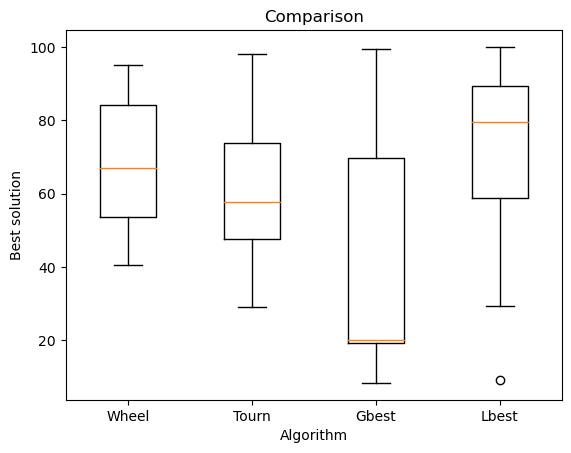

wheel and tourn 2: statistic=-0.9798439251467852, p-value=0.3271631660572756
wheel and gbest 2: statistic=3.191768825478142, p-value=0.0014140445715624189
wheel and lbest 2: statistic=-1.2320809751845714, p-value=0.21791883734713324
tourn and gbest 2: statistic=2.8231146754229157, p-value=0.004755955698793252
tourn and lbest 2: statistic=-2.16341777532409, p-value=0.03050906163250367
gbest and lbest 2: statistic=3.4828115755217413, p-value=0.0004961774599006228

                     Mean             Median  Standard Deviation  \
                                                                   
wheel             67.2895            67.1275  16.377731298931486   
tourn  61.506099999999996            57.8125   17.25701910933635   
gbest              39.876               20.0  30.601872883861212   
lbest              71.512  79.60000000000001  25.756604123991192   

                  Minimum  Maximum  
                                    
wheel                40.6  95.0725  
tourn  29.057

In [3]:
# Separate the columns
values = [[float(val) for val in line.strip().split()] for line in lines]
values2 = [[float(val) for val in line.strip().split()] for line in lines2]
values3 = [[float(val) for val in line.strip().split()] for line in lines3]
values4 = [[float(val) for val in line.strip().split()] for line in lines4]

# Compare each column within each file
for i in range(len(values[0])):
    wheel = [values[j][i] for j in range(len(values))]
    tourn = [values2[j][i] for j in range(len(values2))]
    gbest = [values3[j][i] for j in range(len(values3))]
    lbest = [values4[j][i] for j in range(len(values4))]
   
        
    # Plot the results
    plt.figure()
    plt.boxplot([wheel, tourn, gbest, lbest])
    plt.xticks([1, 2, 3, 4], ['Wheel', 'Tourn', 'Gbest', 'Lbest'])
    plt.xlabel('Algorithm')
    plt.ylabel('Best solution')
    plt.title('Comparison')
    plt.show()
    
    statistic, p_value = ranksums(tourn, wheel)
    print(f'wheel and tourn {i+1}: statistic={statistic}, p-value={p_value}')
    
    statistic2, p_value2 = ranksums(wheel, gbest)
    print(f'wheel and gbest {i+1}: statistic={statistic2}, p-value={p_value2}')
    
    statistic3, p_value3 = ranksums(wheel, lbest)
    print(f'wheel and lbest {i+1}: statistic={statistic3}, p-value={p_value3}')
    
    statistic4, p_value4 = ranksums(tourn, gbest)
    print(f'tourn and gbest {i+1}: statistic={statistic4}, p-value={p_value4}')
    
    statistic5, p_value5 = ranksums(tourn, lbest)
    print(f'tourn and lbest {i+1}: statistic={statistic5}, p-value={p_value5}')
    
    statistic6, p_value6 = ranksums(lbest, gbest)
    print(f'gbest and lbest {i+1}: statistic={statistic6}, p-value={p_value6}')
    print() 
    
  
    # Calculate statistics for optimal solution values
    optimal_values = np.array(wheel)
    mean = np.mean(optimal_values)
    median = np.median(optimal_values)
    std_dev = np.std(optimal_values)
    minimum = np.min(optimal_values)
    maximum = np.max(optimal_values)

    optimal_values2 = np.array(tourn)
    mean2 = np.mean(optimal_values2)
    median2 = np.median(optimal_values2)
    std_dev2 = np.std(optimal_values2)
    minimum2 = np.min(optimal_values2)
    maximum2 = np.max(optimal_values2)

    optimal_values3 = np.array(gbest)
    mean3 = np.mean(optimal_values3)
    median3 = np.median(optimal_values3)
    std_dev3 = np.std(optimal_values3)
    minimum3 = np.min(optimal_values3)
    maximum3 = np.max(optimal_values3)

    optimal_values4 = np.array(lbest)
    mean4 = np.mean(optimal_values4)
    median4 = np.median(optimal_values4)
    std_dev4 = np.std(optimal_values4)
    minimum4 = np.min(optimal_values4)
    maximum4 = np.max(optimal_values4)
    np.set_printoptions(precision=sys.float_info.dig)

    
    data = {
        '': ['wheel', 'tourn', 'gbest', 'lbest'],
        'Mean': [str(mean), str(mean2), str(mean3), str(mean4)],
        'Median': [str(median), str(median2), str(median3), str(median4)],
        'Standard Deviation': [str(std_dev), str(std_dev2), str(std_dev3), str(std_dev4)],
        'Minimum': [str(minimum), str(minimum2), str(minimum3), str(minimum4)],
        'Maximum': [str(maximum), str(maximum2), str(maximum3), str(maximum4)]
    }
    df = pd.DataFrame(data)

    # Set the index to the first column
    df.set_index('', inplace=True)

    print(df)
    print('-----------------------------------------------------------------------------')
    